In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [32]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

Class distribution before SMOTE:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


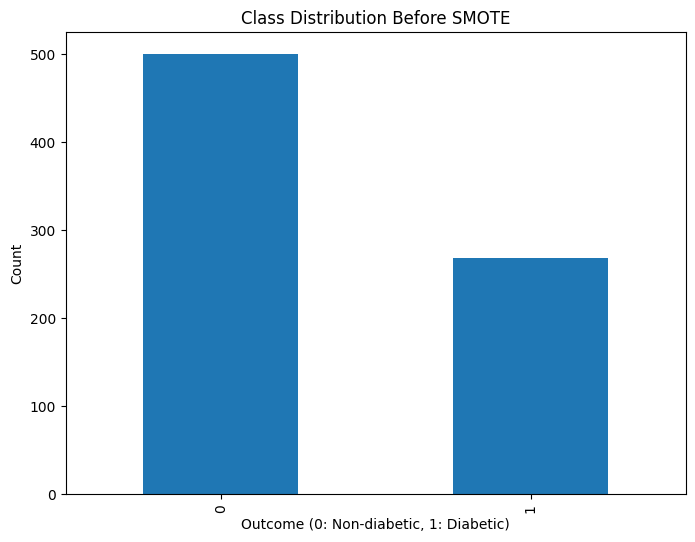

In [33]:
# Install imbalanced-learn if not already installed
!pip install -q imbalanced-learn

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(df['Outcome'].value_counts(normalize=True))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Outcome (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()


Class distribution after SMOTE (Training set):
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64


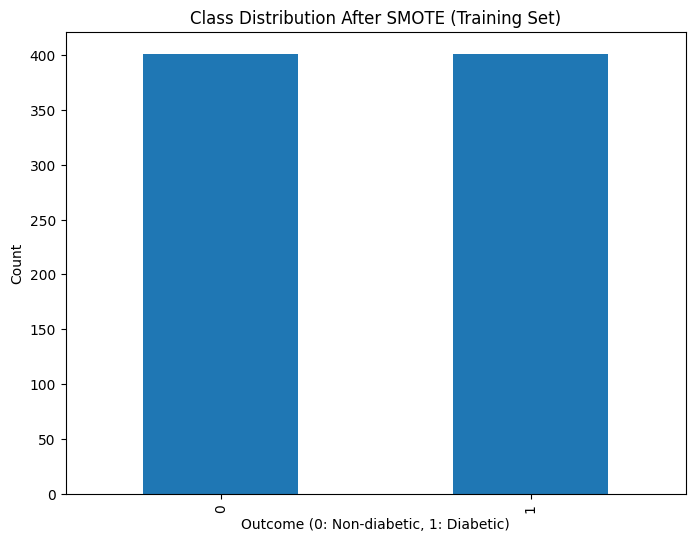

In [34]:
# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE (Training set):")
print(pd.Series(y_train_smote).value_counts(normalize=True))

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 6))
pd.Series(y_train_smote).value_counts().plot(kind='bar')
plt.title('Class Distribution After SMOTE (Training Set)')
plt.xlabel('Outcome (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No Null values found.

In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


1. Glucose relates directly with the outcome. Higher the glucose level higher the chance of being diabetic.
2. BMI is the second largest cause of diabetes.
3. Blood Pressure relates the least with the Outcome(diabetic or not).


<Axes: >

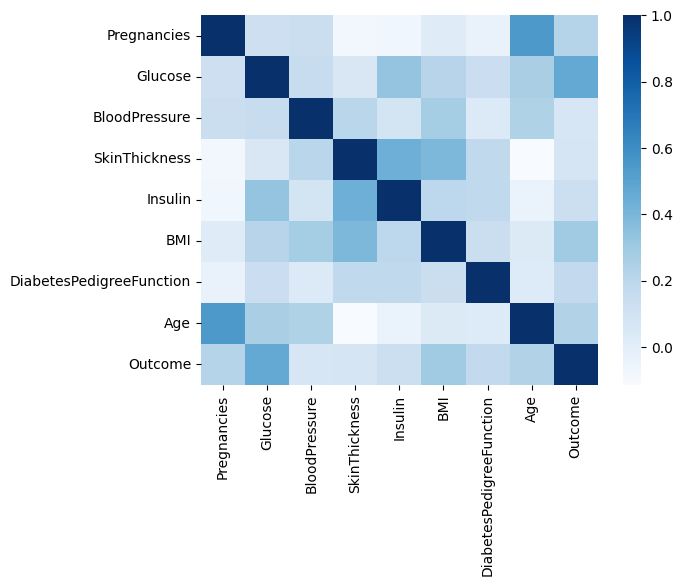

In [39]:
import seaborn as sns
sns.heatmap(df.corr(), cmap = 'Blues')

When comparing the last column we found the same results as EDA.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.drop('Outcome', axis=1)

In [42]:
y = df['Outcome']

In [43]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Now we will apply Standard Scaler only on the features.

In [44]:
import joblib
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [45]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [46]:
cols = X.columns 
X_df = pd.DataFrame(X_scaled, columns = cols)

In [47]:
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [49]:
# Train Logistic Regression with SMOTE-balanced data
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [50]:
print("Training Score", model_LR.score(X_train, y_train))
print("Testing Score", model_LR.score(X_test, y_test))

Training Score 0.758957654723127
Testing Score 0.7077922077922078


In [51]:
from sklearn.metrics import classification_report
y_pred = model_LR.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [66]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', C=0.21, random_state=42)
model_svc.fit(X_train_smote, y_train_smote)

SVC(C=0.21, random_state=42)

Choosing hyperparameters: kernel = 'rbf',C=0.21 was the best choice, by hit and trial.

In [67]:
print("Training Score", model_svc.score(X_train, y_train))
print("Testing Score", model_svc.score(X_test, y_test))

Training Score 0.7752442996742671
Testing Score 0.7142857142857143


In [68]:
from sklearn.metrics import classification_report
y_pred = model_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        99
           1       0.58      0.76      0.66        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

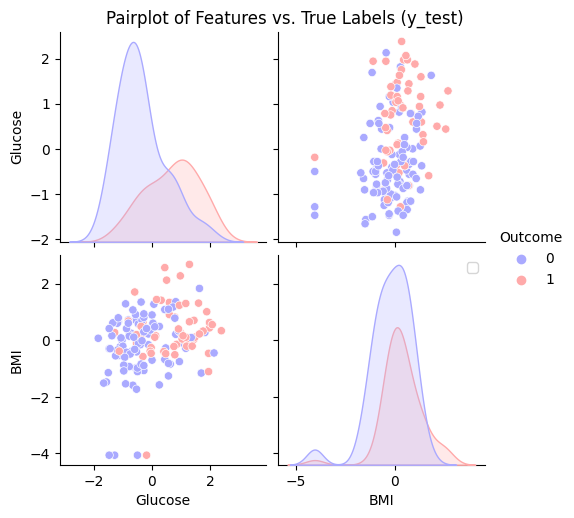

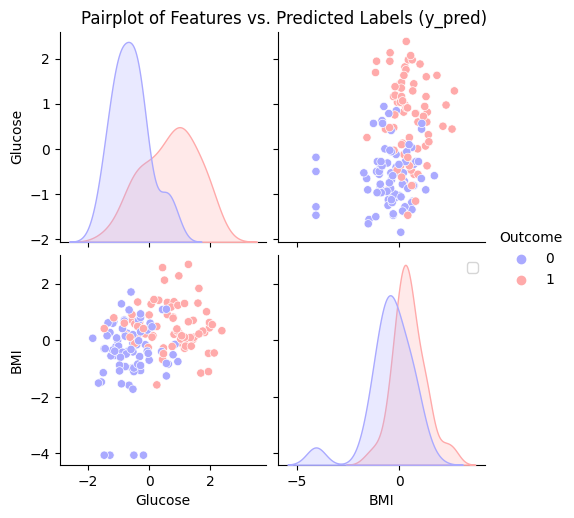

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
df_true = X_test[["Glucose", "BMI"]].copy()
df_true['Outcome'] = y_test
df_2 = X_test[["Glucose", "BMI"]].copy()
df_2['Outcome'] = y_pred
sns.pairplot(df_true, hue='Outcome', palette='bwr')
plt.suptitle('Pairplot of Features vs. True Labels (y_test)', y=1.02)
plt.legend()
sns.pairplot(df_2, hue='Outcome', palette='bwr')
plt.suptitle('Pairplot of Features vs. Predicted Labels (y_pred)', y=1.02)
plt.legend()

In [70]:
import joblib
joblib.dump(model_svc, 'best_model.pkl')

['best_model.pkl']